# FAKE NEWS DETECTION PROJECT

### Loading the dataset 

In [1]:
import pandas as pd

df = pd.read_csv("fake_news_kaggle/train.csv")
df.dropna(inplace = True)

In [2]:
print("Shape of News data:", df.shape)
print("News data columns", df.columns)

Shape of News data: (18285, 5)
News data columns Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


In [3]:
display(df)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


0    10361
1     7924
Name: label, dtype: int64


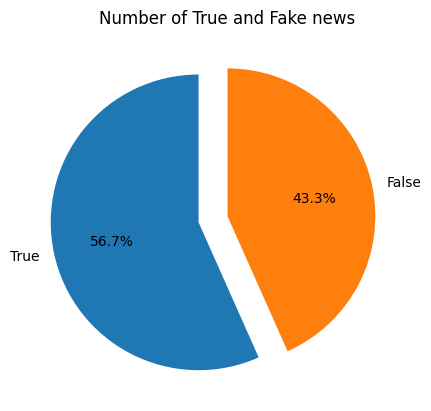

In [4]:
import matplotlib.pyplot as plt

print(df.label.value_counts())
plt.title("Number of True and Fake news")
plt.pie(df.label.value_counts(),labels=["True","False"],autopct='%1.1f%%',explode =[0.2,0], startangle=90)
plt.show()

In [5]:
df.text=df.title+" "+df.author+" "+df.text

In [6]:
df=df.drop(['id','title','author'],axis=1)

In [7]:
text_length = df.text.str.split().str.len()
text_length.describe()

count    18285.000000
mean       818.056440
std        886.831104
min          4.000000
25%        318.000000
50%        625.000000
75%       1110.000000
max      24245.000000
Name: text, dtype: float64

In [8]:
percentile25 = text_length.quantile(.1)
percentile75 = text_length.quantile(.99)

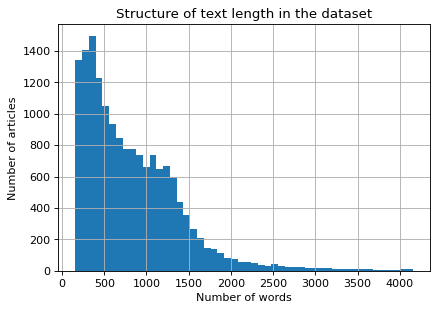

In [9]:
from matplotlib.pyplot import figure
figure(figsize=(6, 4), dpi=80)
plt.hist(text_length,bins=50,range=(percentile25, percentile75))
plt.ylabel('Number of articles')
plt.xlabel('Number of words')
plt.title('Structure of text length in the dataset')
plt.grid(True)
plt.show()

## Cleaning data

### Remove all besides text (mainly punctuaction)

In [10]:
df.text = df.text.str.replace('[^\w\s]','',regex=True)

### Lowering the text

In [11]:
df.text = df.text.str.lower()

### Tokenization

In [12]:
df['text']=df.apply(lambda row: row['text'].split(),axis=1)

### Stopwords removal

In [13]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
stopwords = [word.replace('\'','') for word in stopwords]
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', '

In [14]:
df['text']=df.apply(lambda row: [word for word in row['text'] if not word in stopwords],axis=1)

### Stemming

In [15]:
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()
df['text']=df.apply(lambda row: [porter_stemmer.stem(word) for word in row['text']],axis=1)

## Data exploration

In [16]:
true_df=df[df["label"]==0]
true_df = true_df.drop('label', axis=1)
false_df=df[df["label"]==1]
false_df = false_df.drop('label', axis=1)

### Wordcount barplot true/false

In [17]:
true_counter = true_df.explode('text').value_counts()
false_counter = false_df.explode('text').value_counts()

In [18]:
true_counter = true_counter.to_frame().reset_index()
true_counter = true_counter.rename(columns={'text':'word', 0:'count'})
false_counter = false_counter.to_frame().reset_index()
false_counter = false_counter.rename(columns={'text':'word', 0:'count'})

In [19]:
print(true_counter.columns)

Index(['word', 'count'], dtype='object')


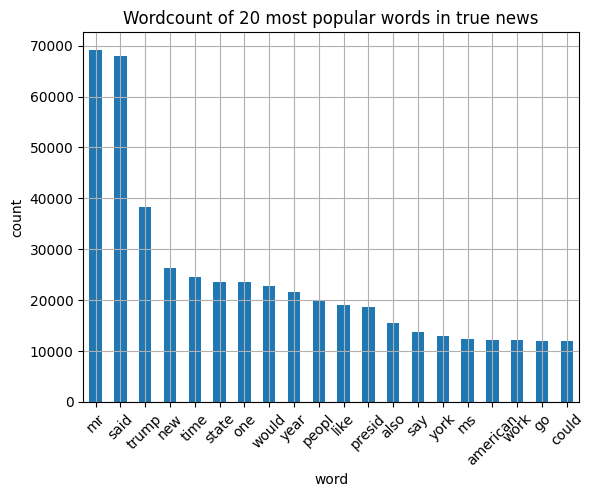

In [20]:
ax = true_counter.iloc[0:20].plot.bar(x='word',y='count', rot=45, grid=True, legend =False,
                                      title="Wordcount of 20 most popular words in true news")
ax.set_ylabel("count")
ax.text=False

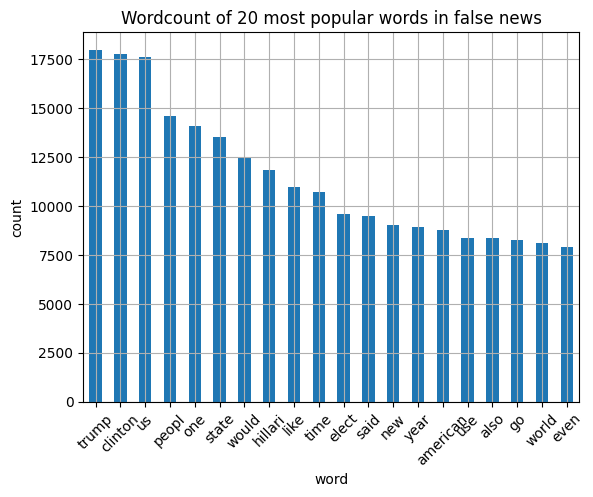

In [21]:
ax = false_counter.iloc[0:20].plot.bar(x='word',y='count', rot=45, grid=True, legend =False,
                                      title="Wordcount of 20 most popular words in false news")
ax.set_ylabel("count")
ax.text=False

### Wordcloud true/false

In [22]:
true_df = true_df.explode('text').reset_index()
true_text = " ".join(true_df.text)
false_df = false_df.explode('text').reset_index()
false_text = " ".join(false_df.text)

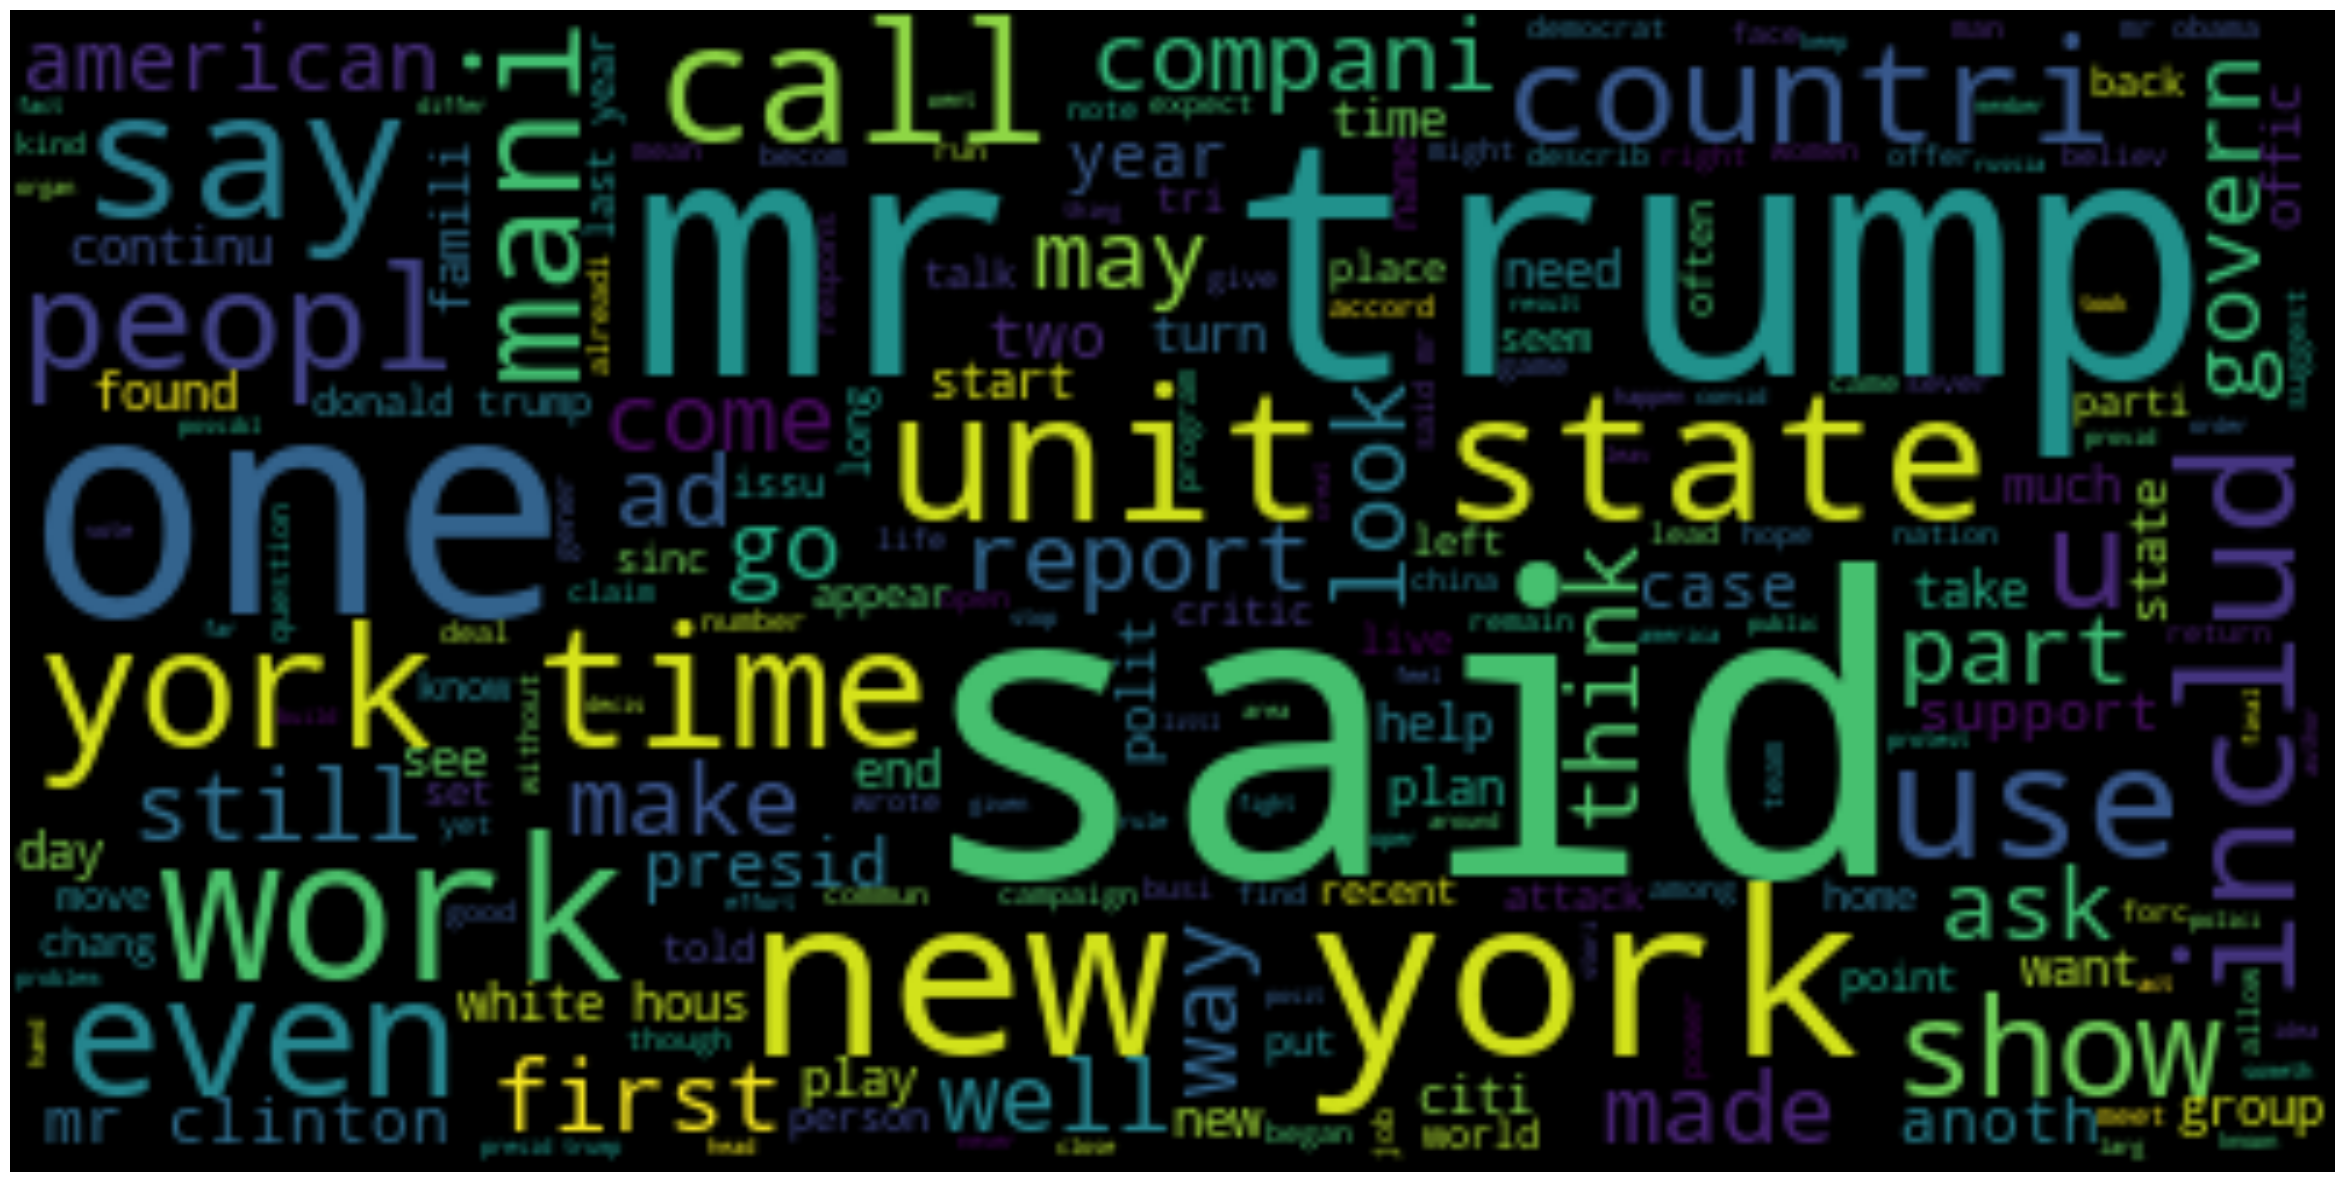

In [23]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(true_text)
plt.figure(figsize=(30,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

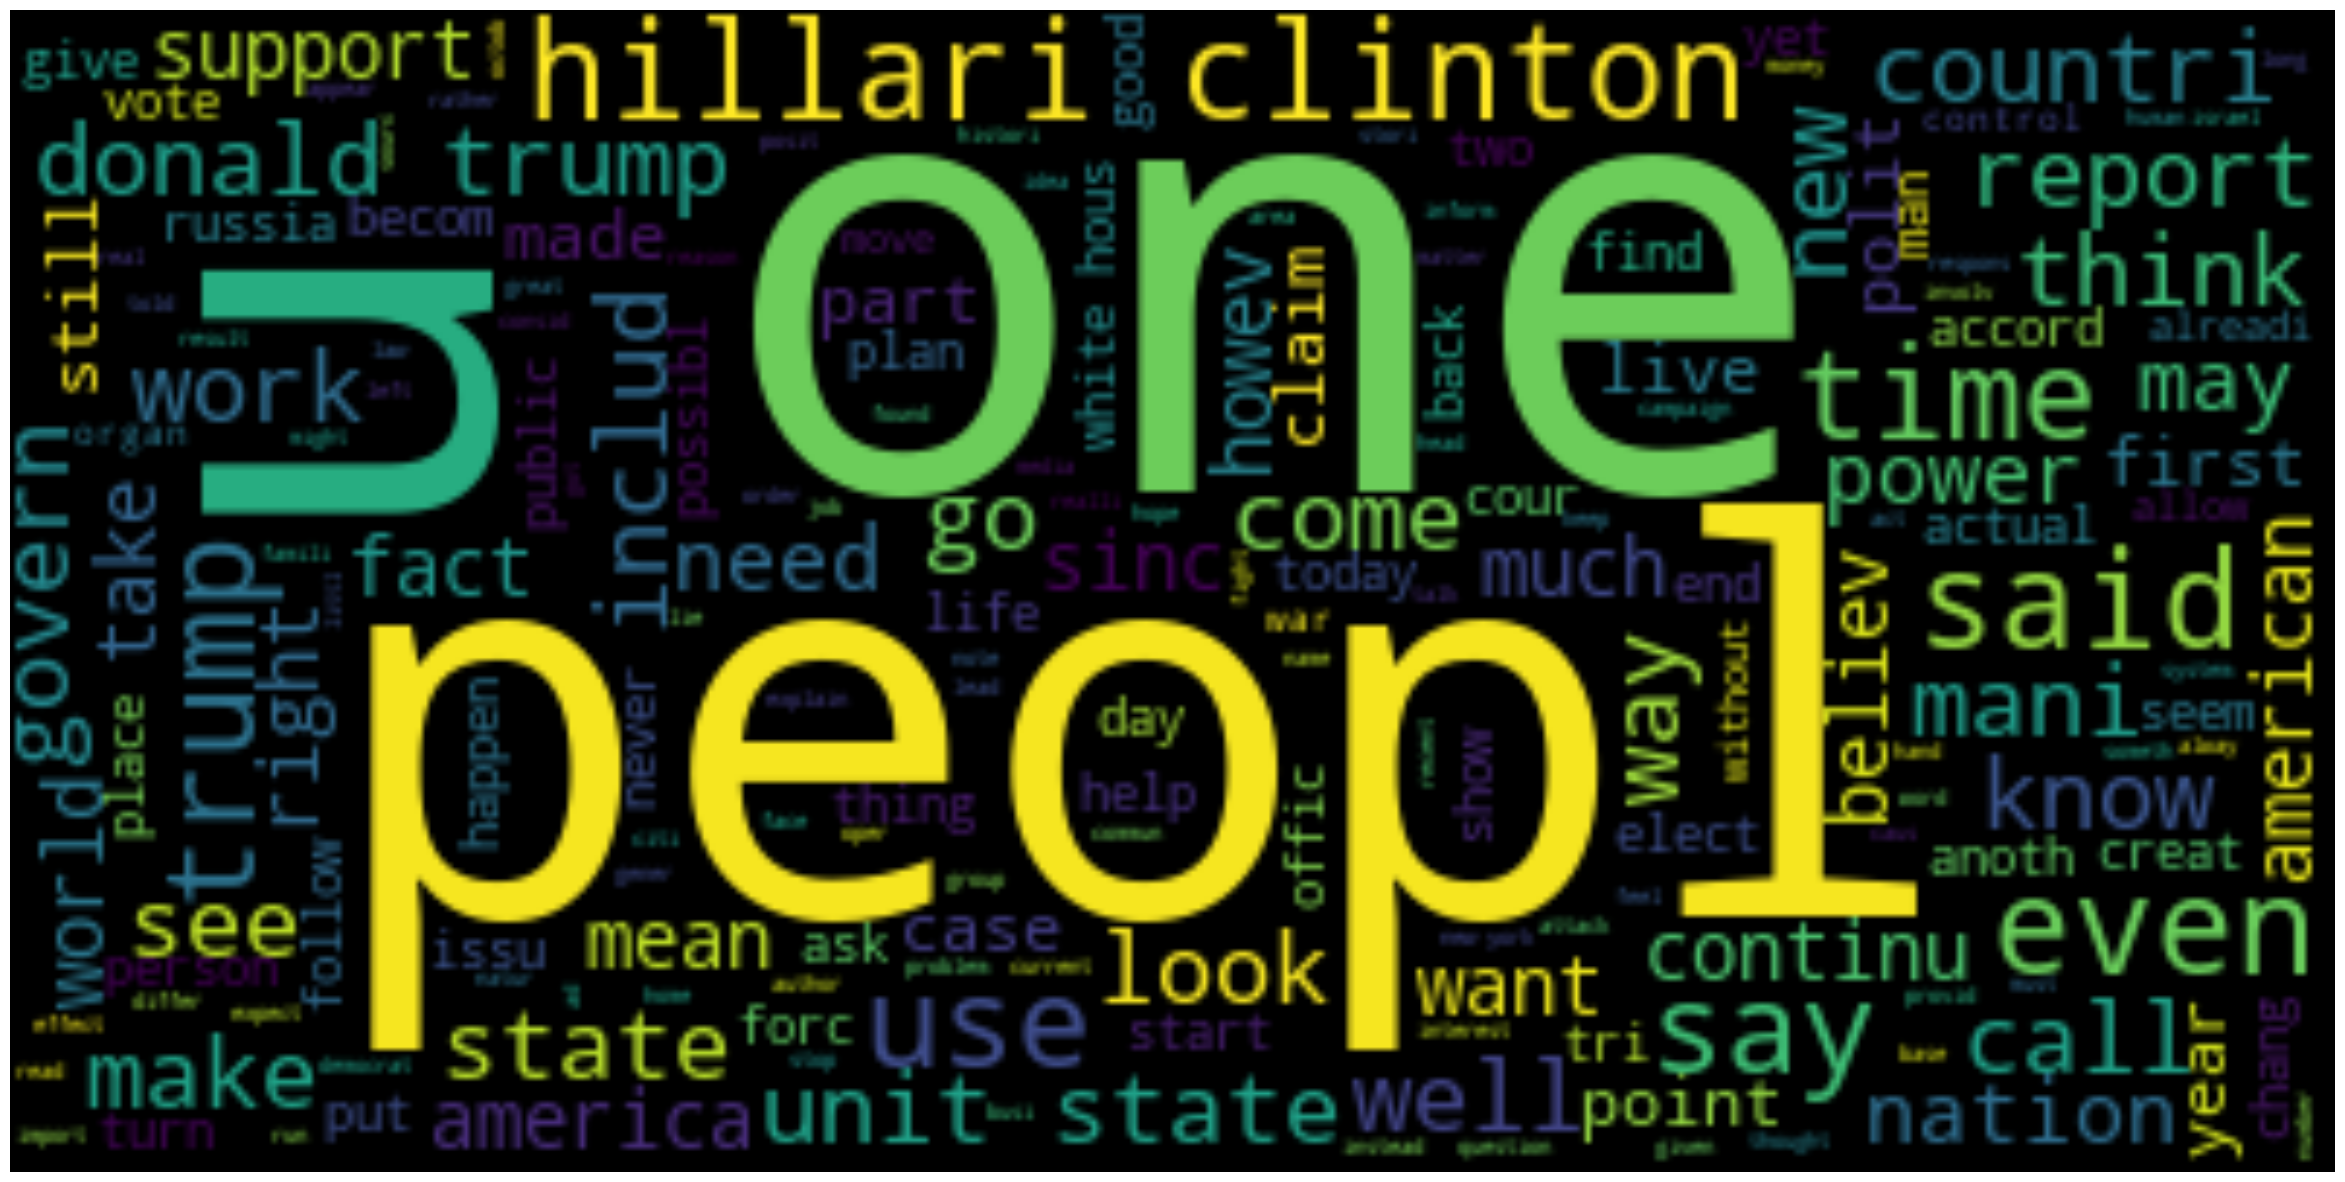

In [24]:
wordcloud = WordCloud().generate(false_text)
plt.figure(figsize=(30,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### N-grams tru/false

In [25]:
from nltk import ngrams

true_bigrams = ngrams(true_text.split(),2)
true_counter = pd.Series(true_bigrams).value_counts().reset_index()
true_counter = true_counter.rename(columns={'index':'bigram', 0:'count'})
false_bigrams = ngrams(false_text.split(),2)
false_counter = pd.Series(false_bigrams).value_counts().reset_index()
false_counter = false_counter.rename(columns={'index':'bigram', 0:'count'})

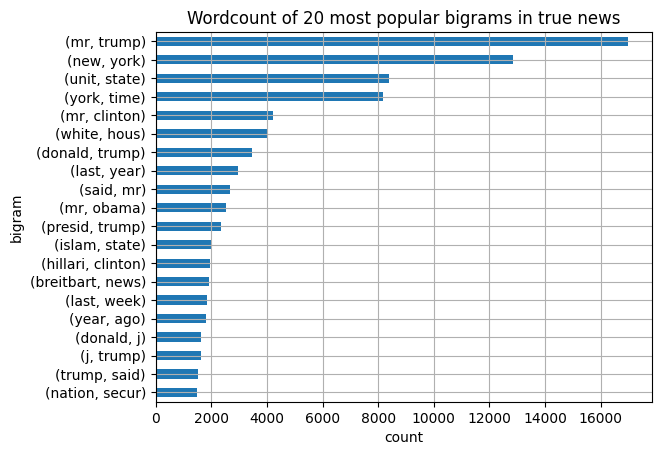

In [26]:
ax = true_counter.iloc[0:20].plot.barh(x='bigram',y='count', grid=True, legend =False,
                                      title="Wordcount of 20 most popular bigrams in true news")
ax.set_xlabel("count")
ax.text=False
ax.invert_yaxis()

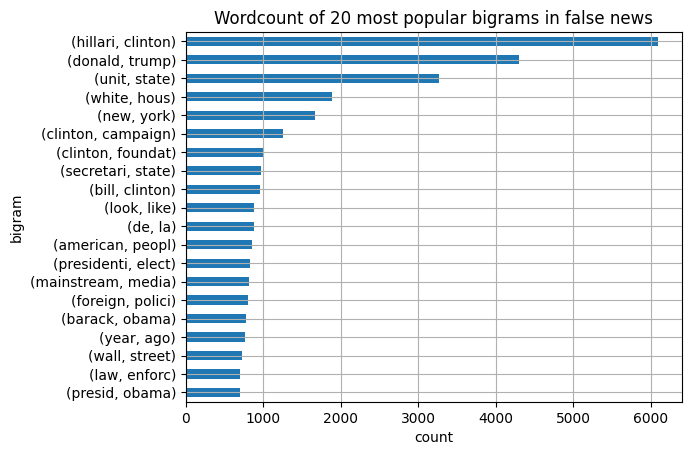

In [27]:
ax = false_counter.iloc[0:20].plot.barh(x='bigram',y='count', grid=True, legend =False,
                                      title="Wordcount of 20 most popular bigrams in false news")
ax.set_xlabel("count")
ax.text=False
ax.invert_yaxis()

### Split the data train test

In [35]:
from sklearn.model_selection import train_test_split 

clean_df = df.apply(lambda row: " ".join(row['text']),axis=1)
X_train, X_test, y_train, y_test = train_test_split(clean_df, df.label, test_size=0.3, random_state=1)

### TF-IDF

In [88]:
X_train

14539    special op studiou bent fight destruct brazil ...
14820    barack obama delay suspend elect hillari forc ...
17590    shock top 100 bombshel wikileak email reveal f...
10128    humili hillari swarm trump support florida ear...
19394    john bolton pari climat accord object reduct n...
                               ...                        
12439    uk bridg trump nigel farag push brexit posit n...
19674    trump inaugur parad lineup border patrol pipe ...
5932     comment scientist find plant could treat diabe...
13849    cnn zakaria obama could given trump saudi spee...
272      crumpl school bu leav chattanooga daze new yor...
Length: 12799, dtype: object

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

### Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf = DecisionTreeClassifier()
clf = clf.fit(tfidf_train,y_train)

In [82]:
print("Accuracy:",clf.score(tfidf_test,y_test)*100)

Accuracy: 95.27889172438935


In [83]:
print("Confusion Matrix: ",confusion_matrix(y_test,prediction))

Confusion Matrix:  [[3089   37]
 [ 385 1975]]


In [84]:
print("Report : ",classification_report(y_test,prediction))

Report :                precision    recall  f1-score   support

           0       0.89      0.99      0.94      3126
           1       0.98      0.84      0.90      2360

    accuracy                           0.92      5486
   macro avg       0.94      0.91      0.92      5486
weighted avg       0.93      0.92      0.92      5486



In [87]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ...,
       '集体安全条约组织是多层面结构能对其成员国可能面临的当代广泛的挑战和威胁作出坚定回应就此而言联合国与集体安全条约组织在维和方面加强合作的潜力还很大在集体安全条约组织内部目前正在加紧工作发展其自身维和能力包括可能提供给联合国维和行动的能力同时集体安全条约组织正在积极促进帮助阿富汗进行冲突后重建以及消除来自该国的毒品威胁的国际努力',
       'ﬁnd', 'ｓꮭv'], dtype=object)

In [85]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_109422 <= 0.00
|   |--- feature_17282 <= 0.00
|   |   |--- feature_101029 <= 0.02
|   |   |   |--- feature_1 <= 0.01
|   |   |   |   |--- feature_92648 <= 0.03
|   |   |   |   |   |--- feature_54049 <= 0.02
|   |   |   |   |   |   |--- feature_26790 <= 0.03
|   |   |   |   |   |   |   |--- feature_44869 <= 0.02
|   |   |   |   |   |   |   |   |--- feature_27309 <= 0.03
|   |   |   |   |   |   |   |   |   |--- feature_44005 <= 0.04
|   |   |   |   |   |   |   |   |   |   |--- feature_65715 <= 0.02
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 43
|   |   |   |   |   |   |   |   |   |   |--- feature_65715 >  0.02
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_44005 >  0.04
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_27309 >  0.03
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feat

### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf = rf.fit(tfidf_train,y_train)

In [57]:
print("Accuracy:",rf.score(tfidf_test,y_test)*100)

0.9230769230769231
Accuracy: 92.31%


In [58]:
print("Confusion Matrix: ",confusion_matrix(y_test,prediction))

[[3089   37]
 [ 385 1975]]


In [ ]:
print("Report : ",classification_report(y_test,prediction))

### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm = svm.fit(tfidf_train,y_train)

In [ ]:
print("Accuracy:",svm.score(tfidf_test,y_test)*100)

In [ ]:
print("Confusion Matrix: ",confusion_matrix(y_test,prediction))

In [ ]:
print("Report : ",classification_report(y_test,prediction))

### Naive Bayes

###  KNN (k- Nearest Neighbors)

### Which classifier has better accuracy

#### https://iopscience.iop.org/article/10.1088/1757-899X/1099/1/012040/pdf